<a href="https://colab.research.google.com/github/opassos/blog/blob/master/_notebooks/2021-10-16-Como-uma-IA-encherga-o-Mundo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setup

In [ ]:
!nvidia-smi

Sat Oct 16 21:51:52 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.74       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  A100-SXM4-40GB      Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P0    43W / 400W |      0MiB / 40536MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install -Uqqq fastai

     |████████████████████████████████| 186 kB 5.1 MB/s 
     |████████████████████████████████| 56 kB 4.8 MB/s 


In [ ]:
from fastai.vision.all import *

## Dataset (MNIST)

In [ ]:
path = untar_data(URLs.MNIST)

In [ ]:
(path/'testing').ls()

(#10) [Path('/root/.fastai/data/mnist_png/testing/3'),Path('/root/.fastai/data/mnist_png/testing/9'),Path('/root/.fastai/data/mnist_png/testing/2'),Path('/root/.fastai/data/mnist_png/testing/5'),Path('/root/.fastai/data/mnist_png/testing/7'),Path('/root/.fastai/data/mnist_png/testing/6'),Path('/root/.fastai/data/mnist_png/testing/8'),Path('/root/.fastai/data/mnist_png/testing/1'),Path('/root/.fastai/data/mnist_png/testing/4'),Path('/root/.fastai/data/mnist_png/testing/0')]

In [ ]:
(path/'testing/6').ls()

(#958) [Path('/root/.fastai/data/mnist_png/testing/6/6933.png'),Path('/root/.fastai/data/mnist_png/testing/6/3744.png'),Path('/root/.fastai/data/mnist_png/testing/6/4239.png'),Path('/root/.fastai/data/mnist_png/testing/6/3657.png'),Path('/root/.fastai/data/mnist_png/testing/6/9138.png'),Path('/root/.fastai/data/mnist_png/testing/6/366.png'),Path('/root/.fastai/data/mnist_png/testing/6/8341.png'),Path('/root/.fastai/data/mnist_png/testing/6/2728.png'),Path('/root/.fastai/data/mnist_png/testing/6/3121.png'),Path('/root/.fastai/data/mnist_png/testing/6/2170.png')...]

In [ ]:
um_seis = Image.open((path/'testing/6').ls()[0])
um_seis

In [ ]:
um_seis = tensor(um_seis)
um_seis.shape

torch.Size([28, 28])

In [ ]:
um_seis[4:14, 4:14]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,  70, 252],
        [  0,   0,   0,   0,   0,   0,   0,   0, 112, 252],
        [  0,   0,   0,   0,   0,   0,   0,  95, 246, 252],
        [  0,   0,   0,   0,   0,   0,   3, 170, 253, 253],
        [  0,   0,   0,   0,   0,   0, 118, 252, 252, 214],
        [  0,   0,   0,   0,   0,  85, 253, 252, 233,  33],
        [  0,   0,   0,   0,   0, 157, 253, 252,  89,   0],
        [  0,   0,   0,   0,   0, 230, 253, 252,  69,   0],
        [  0,   0,   0,   0,  51, 243, 255, 249,  63,   0],
        [  0,   0,   0,   0,  93, 252, 253, 132,   0,   0]], dtype=torch.uint8)

In [ ]:
2**8 - 1

255

## EDA

In [ ]:
(pd.DataFrame(um_seis)
   .style.set_properties(
       **{'font-size':'6pt', 
          'width': '18px', 
          'text-align': 
          'center'})
   .background_gradient('Greys_r', vmax = 255, vmin = 0)
)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,104,253,181,9,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,13,215,252,249,75,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,70,252,252,199,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,112,252,252,116,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,95,246,252,252,11,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,3,170,253,253,128,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,118,252,252,214,18,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,85,253,252,233,33,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
um_seis = um_seis/255

In [ ]:
(pd.DataFrame(um_seis)
   .style.set_properties(
       **{'font-size':'6pt', 
          'width': '18px', 
          'text-align': 
          'center'})
   .background_gradient('Greys_r', vmax = 1, vmin = 0)
   .format('{:.2f}')
)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.41,0.99,0.71,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.05,0.84,0.99,0.98,0.29,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.27,0.99,0.99,0.78,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.44,0.99,0.99,0.45,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.37,0.96,0.99,0.99,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.67,0.99,0.99,0.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.46,0.99,0.99,0.84,0.07,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.33,0.99,0.99,0.91,0.13,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


## Blur

In [ ]:
kernel = torch.ones((3,3))/9
kernel

tensor([[0.1111, 0.1111, 0.1111],
        [0.1111, 0.1111, 0.1111],
        [0.1111, 0.1111, 0.1111]])

In [ ]:
um_seis.view(1,1,28,28).shape

torch.Size([1, 1, 28, 28])

In [ ]:
um_seis_borrado = F.conv2d(um_seis.view(1,1,28,28), kernel.view(1,1,3,3), padding=1)

In [ ]:
(pd.DataFrame(um_seis_borrado.view(28,28))
   .style.set_properties(
       **{'font-size':'6pt', 
          'width': '18px', 
          'text-align': 
          'center'})
   .background_gradient('Greys_r', vmax = 1, vmin = 0)
   .format('{:.2f}')
)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.05,0.16,0.23,0.19,0.08,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.14,0.36,0.55,0.44,0.22,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.04,0.28,0.61,0.85,0.64,0.31,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.08,0.40,0.73,0.89,0.61,0.28,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.04,0.23,0.56,0.85,0.80,0.47,0.14,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.12,0.38,0.71,0.87,0.66,0.33,0.06,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.05,0.28,0.61,0.87,0.81,0.49,0.18,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.04,0.20,0.49,0.78,0.83,0.60,0.28,0.06,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.11,0.38,0.71,0.85,0.69,0.37,0.12,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


### Padding


Padding é uma margem extra na imagem:

<img src='https://raw.githubusercontent.com/vdumoulin/conv_arithmetic/master/gif/same_padding_no_strides.gif' width=350px/>

https://github.com/vdumoulin/conv_arithmetic

## Muito borrada

In [ ]:
kernel = torch.ones((7,7))
kernel = kernel/kernel.sum()
kernel

tensor([[0.0204, 0.0204, 0.0204, 0.0204, 0.0204, 0.0204, 0.0204],
        [0.0204, 0.0204, 0.0204, 0.0204, 0.0204, 0.0204, 0.0204],
        [0.0204, 0.0204, 0.0204, 0.0204, 0.0204, 0.0204, 0.0204],
        [0.0204, 0.0204, 0.0204, 0.0204, 0.0204, 0.0204, 0.0204],
        [0.0204, 0.0204, 0.0204, 0.0204, 0.0204, 0.0204, 0.0204],
        [0.0204, 0.0204, 0.0204, 0.0204, 0.0204, 0.0204, 0.0204],
        [0.0204, 0.0204, 0.0204, 0.0204, 0.0204, 0.0204, 0.0204]])

Dica: para manter a imagem do mesmo tamanho, padding vale k//2

In [ ]:
um_seis_muito_borrado = F.conv2d(
    um_seis.view(1,1,28,28), 
    kernel.view(1,1,7,7), padding=3)

In [ ]:
(pd.DataFrame(um_seis_muito_borrado.view(28,28))
   .style.set_properties(
       **{'font-size':'6pt', 
          'width': '18px', 
          'text-align': 
          'center'})
   .background_gradient('Greys_r', vmax = 1, vmin = 0)
   .format('{:.2f}')
)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.07,0.10,0.11,0.11,0.11,0.11,0.08,0.04,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.05,0.11,0.16,0.17,0.17,0.17,0.16,0.12,0.06,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.08,0.16,0.22,0.23,0.23,0.23,0.21,0.15,0.07,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.04,0.13,0.23,0.29,0.30,0.30,0.29,0.25,0.17,0.07,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.08,0.18,0.29,0.35,0.36,0.36,0.34,0.28,0.18,0.07,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.05,0.13,0.25,0.36,0.42,0.43,0.42,0.38,0.30,0.18,0.07,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.04,0.10,0.19,0.31,0.40,0.45,0.45,0.42,0.36,0.26,0.14,0.05,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.07,0.15,0.25,0.35,0.42,0.45,0.43,0.38,0.30,0.20,0.10,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8,0.00,0.00,0.00,0.00,0.00,0.00,0.04,0.11,0.21,0.31,0.39,0.44,0.45,0.42,0.34,0.25,0.16,0.07,0.02,0.01,0.01,0.01,0.01,0.00,0.00,0.00,0.00,0.00
9,0.00,0.00,0.00,0.00,0.00,0.00,0.06,0.15,0.27,0.37,0.43,0.46,0.46,0.40,0.33,0.24,0.17,0.12,0.09,0.09,0.09,0.07,0.04,0.02,0.00,0.00,0.00,0.00


## 'desborrado'

In [ ]:
kernel = torch.tensor(
    [[ 0, -1,  0],
     [-1,  5, -1],
     [ 0, -1,  0]], dtype = torch.float
)
um_seis_desborrado = F.conv2d(um_seis.view(1,1,28,28), kernel.view(1,1,3,3), padding=1)
(pd.DataFrame(um_seis_desborrado.view(28,28))
   .style.set_properties(
       **{'font-size':'6pt', 
          'width': '18px', 
          'text-align': 
          'center'})
   .background_gradient('Greys_r', vmax = 1, vmin = 0)
   .format('{:.2f}')
)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.41,-0.99,-0.71,-0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.46,0.20,2.85,1.55,-0.83,-0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.05,-0.86,1.78,1.14,2.11,0.46,-0.29,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.27,-0.11,1.85,1.20,1.48,-1.07,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.81,-0.03,1.54,1.52,0.46,-0.45,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.38,0.23,2.03,1.01,2.42,-1.23,-0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.01,-1.07,0.97,1.35,1.64,0.46,-0.55,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.80,0.32,1.84,1.21,2.02,-0.99,-0.07,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.33,0.06,2.18,1.06,2.11,-1.11,-0.20,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


## Borda

In [ ]:
kernel = torch.tensor(
    [[-1, -1, -1],
     [-1,  8, -1],
     [-1, -1, -1]], dtype = torch.float
)
um_seis_bordado = F.conv2d(um_seis.view(1,1,28,28), kernel.view(1,1,3,3), padding=1)
(pd.DataFrame(um_seis_bordado.view(28,28))
   .style.set_properties(
       **{'font-size':'6pt', 
          'width': '18px', 
          'text-align': 
          'center'})
   .background_gradient('Greys_r', vmax = 1, vmin = 0)
   .format('{:.2f}')
)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.41,-1.40,-2.11,-1.74,-0.75,-0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.05,-1.30,0.39,4.01,2.39,-1.70,-0.33,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.33,-2.11,2.05,1.22,3.02,-0.15,-0.33,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.76,-1.11,2.35,0.90,1.55,-2.51,-0.29,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.37,-2.05,-1.06,1.29,1.69,-0.15,-1.28,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.01,-1.05,-0.09,2.28,1.05,2.95,-2.59,-0.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.47,-2.40,0.55,1.14,1.60,0.09,-1.60,-0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.33,-1.80,-0.28,1.89,1.40,2.13,-1.90,-0.57,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.95,-0.40,2.57,1.23,2.04,-2.13,-1.04,-0.07,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [ ]:
(pd.DataFrame(um_seis.view(28,28))
   .style.set_properties(
       **{'font-size':'6pt', 
          'width': '18px', 
          'text-align': 
          'center'})
   .background_gradient('Greys_r', vmax = 1, vmin = 0)
   .format('{:.2f}')
)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.41,0.99,0.71,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.05,0.84,0.99,0.98,0.29,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.27,0.99,0.99,0.78,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.44,0.99,0.99,0.45,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.37,0.96,0.99,0.99,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.67,0.99,0.99,0.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.46,0.99,0.99,0.84,0.07,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.33,0.99,0.99,0.91,0.13,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [ ]:
(
    0.99*-1 + 0.99*-1 + 0.99*-1 +
    0.94*0 + 0.99*0 + 0.62*0 +
    0.2*1 + 0.27*1 + 0.02*1
)

-2.4799999999999995

In [ ]:
(
    0*-1 + 0.25*-1 + 0*-1 +
    0.73*0 + 0.97*0 + 0.82*0 +
    0.99*1 + 0.99*1 + 0.99*1
)

2.7199999999999998

In [ ]:
kernel = torch.tensor(
    [[-1, 0, 1],
     [-1, 0, 1],
     [-1, 0, 1]], dtype = torch.float
)
um_seis_bordado = F.conv2d(um_seis.view(1,1,28,28), kernel.view(1,1,3,3), padding=1)
(pd.DataFrame(um_seis_bordado.view(28,28))
   .style.set_properties(
       **{'font-size':'6pt', 
          'width': '18px', 
          'text-align': 
          'center'})
   .background_gradient('Greys_r', vmax = 1, vmin = -1)
   .format('{:.2f}')
)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.41,0.99,0.30,-0.96,-0.71,-0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.05,1.25,1.93,0.44,-1.65,-1.69,-0.33,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.33,2.24,2.64,0.23,-2.64,-2.47,-0.33,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.76,2.82,2.20,-0.61,-2.67,-2.21,-0.29,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.37,1.68,2.59,1.29,-1.69,-2.96,-1.28,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,1.04,2.38,1.93,0.08,-2.47,-2.48,-0.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.47,2.03,2.47,0.79,-1.38,-2.78,-1.56,-0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.33,1.47,2.31,1.43,-0.68,-2.32,-1.96,-0.57,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.95,2.45,2.02,-0.20,-2.00,-2.18,-0.97,-0.07,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [ ]:
kernel = torch.tensor(
    [[-1, -1, -1],
     [ 0,  0,  0],
     [ 1,  1,  1]], dtype = torch.float
)
um_seis_bordado = F.conv2d(um_seis.view(1,1,28,28), kernel.view(1,1,3,3), padding=1)
(pd.DataFrame(um_seis_bordado.view(28,28))
   .style.set_properties(
       **{'font-size':'6pt', 
          'width': '18px', 
          'text-align': 
          'center'})
   .background_gradient('Greys_r', vmax = 1, vmin = -1)
   .format('{:.2f}')
)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.41,1.40,2.11,1.74,0.75,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.05,0.89,1.88,2.81,2.26,1.27,0.29,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.27,0.85,0.85,0.65,0.03,0.04,-0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.39,0.53,0.53,-0.38,-0.82,-0.82,-0.29,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.37,1.06,1.06,0.69,-0.74,-0.74,-0.74,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.68,1.23,1.22,0.07,-0.94,-0.94,-0.45,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.46,1.08,1.10,0.49,-1.04,-1.11,-0.96,-0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.33,1.31,1.64,1.22,-0.62,-1.44,-1.36,-0.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.62,1.15,1.15,-0.11,-1.48,-1.55,-0.91,-0.07,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


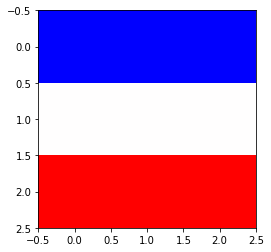

In [ ]:
kernel = torch.tensor(
    [[-1, -1, -1],
     [ 0,  0,  0],
     [ 1,  1,  1]], dtype = torch.float
)
plt.imshow(kernel, cmap = 'bwr');

## CNN

Path: `/root/.fastai/data/mnist_png`
* tarining
    * 0
    * 1
    * 2
    * ...
    
* testing
    * 0
    * 1
    * 2
    * ...

In [ ]:
path.ls()

(#2) [Path('/root/.fastai/data/mnist_png/training'),Path('/root/.fastai/data/mnist_png/testing')]

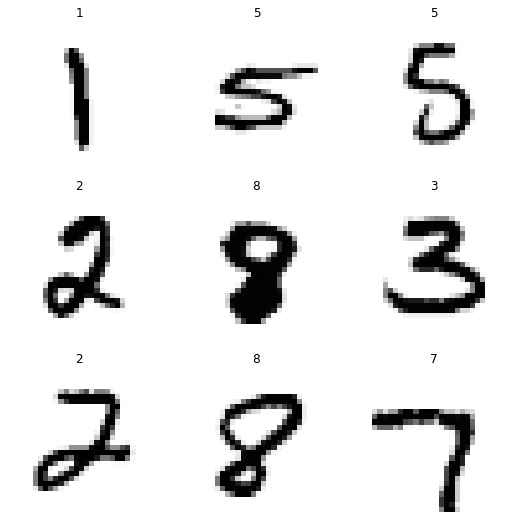

In [ ]:
dls = DataBlock(
    blocks = (ImageBlock(cls=PILImageBW), CategoryBlock),
    get_items = get_image_files,
    splitter = GrandparentSplitter(train_name='training', valid_name='testing'),
    get_y = parent_label
).dataloaders(path, bs = 128, num_workers = 10)
dls.show_batch()

In [ ]:
learn = Learner(dls, xresnet18(c_in = 1), metrics = error_rate)

In [ ]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,0.095464,0.093186,0.029300,00:17
1,0.056486,0.045684,0.015800,00:17
2,0.028911,0.031794,0.010800,00:16
3,0.010618,0.018615,0.006500,00:17
4,0.004242,0.018373,0.005600,00:17


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [ ]:
model = learn.model

In [ ]:
kernels = model[0][0].weight.cpu().detach().numpy()
kernels

In [ ]:
kernels.shape

(32, 1, 3, 3)

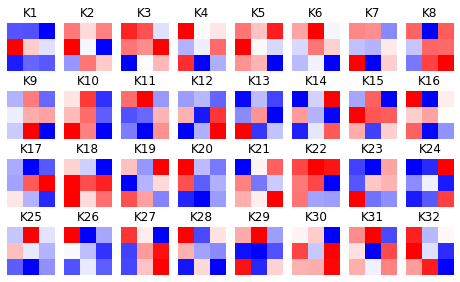

In [ ]:
cols = 8
rows = 4
fig = plt.figure(figsize=(cols, 1.2*rows))
for i in range(rows*cols):
  img = kernels[i, 0]
  fig.add_subplot(rows, cols, i + 1)
  plt.imshow(img, cmap='bwr')
  plt.title(f'K{i+1}')
  plt.axis('off')
plt.show()

In [ ]:
learn.summary()

XResNet (Input shape: 128)
Layer (type)         Output Shape         Param #    Trainable 
                     128 x 32 x 14 x 14  
Conv2d                                    288        True      
BatchNorm2d                               64         True      
ReLU                                                           
Conv2d                                    9216       True      
BatchNorm2d                               64         True      
ReLU                                                           
____________________________________________________________________________
                     128 x 64 x 14 x 14  
Conv2d                                    18432      True      
BatchNorm2d                               128        True      
ReLU                                                           
MaxPool2d                                                      
Conv2d                                    36864      True      
BatchNorm2d                               12

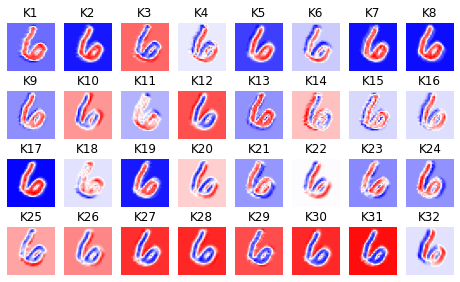

In [ ]:
cols = 8
rows = 4
fig = plt.figure(figsize=(cols, 1.2*rows))
for i in range(rows*cols):
  img = F.conv2d(um_seis.view(1,1,28,28), tensor(kernels[i:i+1]), stride=1, padding=1).view(28,28)
  fig.add_subplot(rows, cols, i + 1)
  plt.imshow(img, cmap='bwr')
  plt.title(f'K{i+1}')
  plt.axis('off')
plt.show()

## Outras layers

<img src='https://raw.githubusercontent.com/fastai/fastbook/780b76bef3127ce5b64f8230fce60e915a7e0735/images/layer1.png'/>

<img src='https://raw.githubusercontent.com/fastai/fastbook/780b76bef3127ce5b64f8230fce60e915a7e0735/images/layer2.png'/>

<img src='https://raw.githubusercontent.com/fastai/fastbook/780b76bef3127ce5b64f8230fce60e915a7e0735/images/chapter2_layer3.PNG'/>

<img src='https://raw.githubusercontent.com/fastai/fastbook/780b76bef3127ce5b64f8230fce60e915a7e0735/images/chapter2_layer4and5.PNG'/>


In [ ]:
resnet152()